# Домашняя работа на 10.11 по курсу "Машинное обучение и анализ данных"
Выполнил Колесников.Д.Е 382006-2

# Постановка задачи

Датасет Top Hits Spotify from 2000-2019 

https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

Этот набор данных содержит статистику 2000 лучших треков на Spotify за период с 2000 по 2019 год. Данные содержат около 18 столбцов, каждый из которых описывает трек и его качества.

In [98]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import statistics as st



In [99]:
data = pd.read_csv('songs_normalize.csv')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Мы видим, что столбцы (признаки) имеют имена

- `artist`: Name of the Artist.
- `song`: Name of the Track.
- `duration_ms`: Duration of the track in milliseconds.
- `explicit`: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- `year`: Release Year of the track.
- `popularity`: The higher the value the more popular the song is.
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `genre`: Genre of the track.

Признаки `artist`, `song`, `key`, `genre` - текстовые  
Признаки `explicit`, `mode` - бинарные  
Остальные признак - числовые  

**Требуется предсказать количественный признак `popularity` по остальным признакам.**

# Визуализация данных

In [101]:
data.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [102]:
print(data.shape)
print(data.columns)

(2000, 18)
Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')


**Разброс**

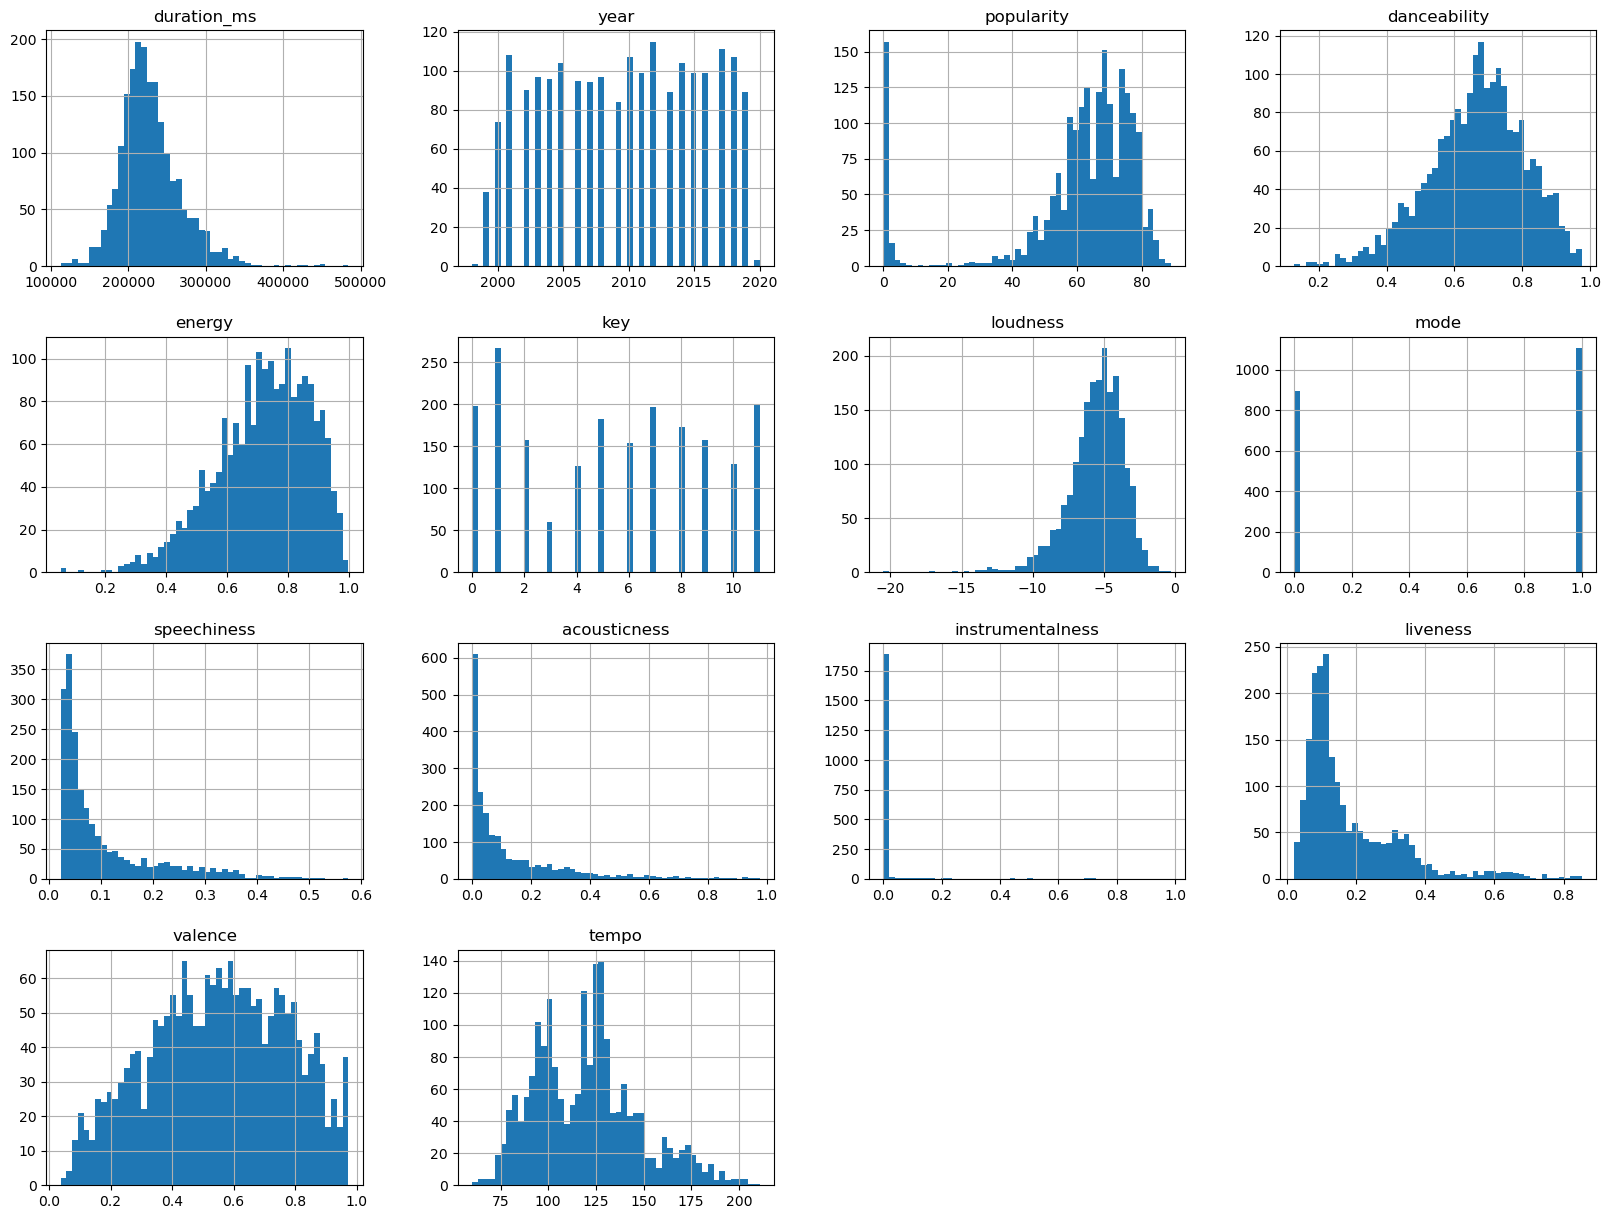

In [103]:
data.hist(bins=50,figsize=(20,15))
plt.show()

*По графику видим что распределение не нормальное, требуется нормализация*

**Матрица корреляции**

C:\Users\denis kolesnikov\AppData\Local\Temp\ipykernel_1464\3611132377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


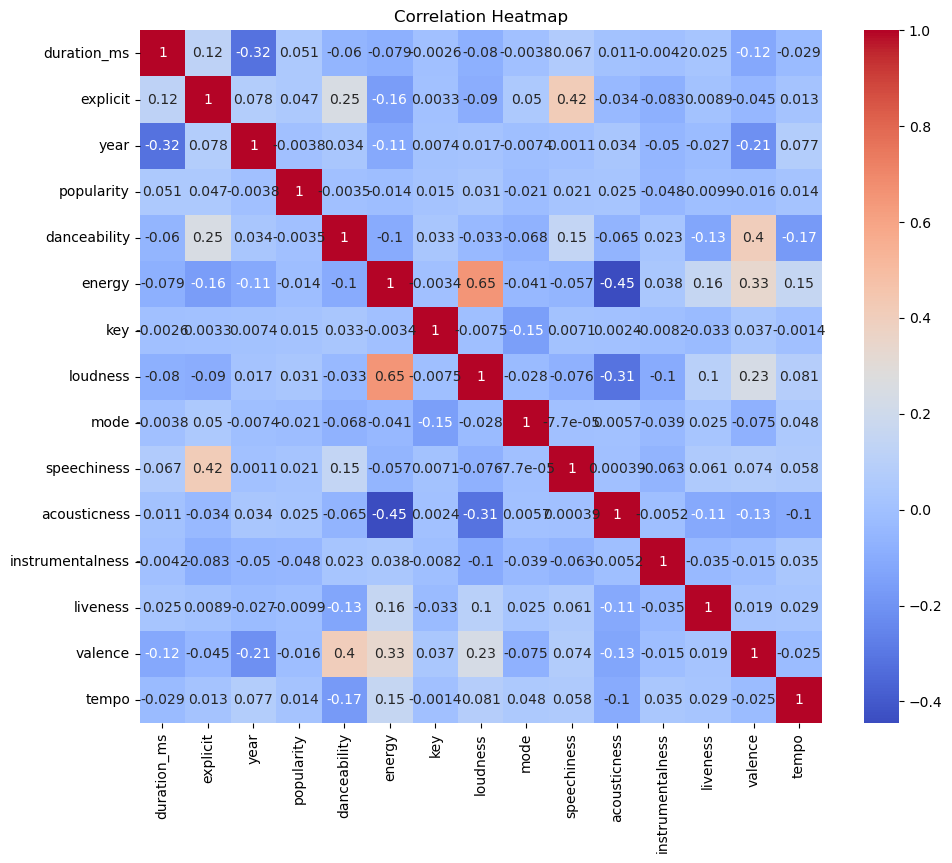

In [104]:
correlation_matrix = data.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Среднее**

In [105]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667438,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512434,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


**Популярность по жанрам**

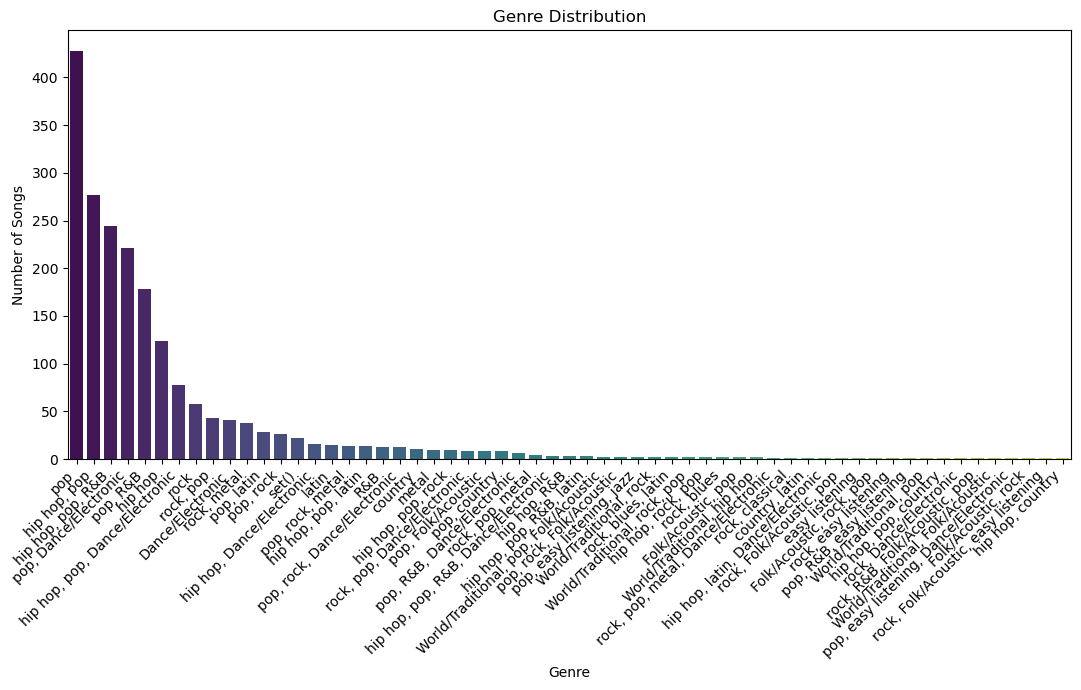

In [106]:
plt.figure(figsize=(11, 7))
genre_counts = data['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Genre Distribution')
plt.tight_layout()
plt.show()

# Обработка датасета

**Выбросы**

In [107]:
data['popularity'].value_counts(dropna = False)


0     126
69     76
68     75
73     69
74     69
     ... 
88      1
89      1
87      1
8       1
7       1
Name: popularity, Length: 76, dtype: int64

**Пропущенные значения**


In [108]:
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Пропущенных значений нет

**Лишние данные**

In [109]:
data.year.unique()


array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

Видим что сюда входит 1998 и 1999 год, датасет не должен включать данные ранее 2000 года

In [110]:
years_drop = data[(data['year'] < 2000) | (data['year'] > 2019)].index
data = data.drop(years_drop)
data.year.unique()


array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014], dtype=int64)

**Удаляем дубликаты**

In [111]:
data[data.duplicated()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376000,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.362000,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.315000,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.292000,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
310,Busta Rhymes,I Know What You Want (feat. Flipmode Squad),324306,True,2002,68,0.648,0.759,6,-4.315,1,0.3060,0.014200,0.000000,0.6480,0.518,85.996,"hip hop, pop"
374,Coldplay,Clocks,307879,False,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,"rock, pop"
376,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
394,Daniel Bedingfield,If You're Not The One,257026,False,2002,58,0.688,0.538,10,-7.608,1,0.0292,0.504000,0.000000,0.1110,0.270,119.998,pop
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.688000,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"


In [112]:
data.drop_duplicates(inplace=True)
data.shape

(1899, 18)

**Категориальные значения**

In [113]:
for col in data.columns:
  if not pd.api.types.is_numeric_dtype(data[col]) or col in ('year','mode'):
    if col != 'artist':
      print(col," with ",len(data[col].unique()),"unique values and most frequent occurrence of",st.mode(data[col]),"as", col)
    else:
      print(col, "variable has all unique values to be", len(data['artist']))

artist variable has all unique values to be 1899
song  with  1840 unique values and most frequent occurrence of Sorry as song
year  with  20 unique values and most frequent occurrence of 2012 as year
mode  with  2 unique values and most frequent occurrence of 1 as mode
genre  with  58 unique values and most frequent occurrence of pop as genre


In [114]:
for col in data.columns:
  if not pd.api.types.is_numeric_dtype(data[col]) or col in ('year', 'mode'):
    continue
  print(col, "top 5 most frequent values:")
  print(data[col].value_counts().head(5))

duration_ms top 5 most frequent values:
185586    3
212106    3
222653    3
221226    3
212360    3
Name: duration_ms, dtype: int64
explicit top 5 most frequent values:
False    1373
True      526
Name: explicit, dtype: int64
popularity top 5 most frequent values:
0     126
68     72
69     71
73     66
74     65
Name: popularity, dtype: int64
danceability top 5 most frequent values:
0.687    11
0.791    11
0.682    10
0.794    10
0.660    10
Name: danceability, dtype: int64
energy top 5 most frequent values:
0.783    13
0.768    11
0.862    10
0.791    10
0.800    10
Name: energy, dtype: int64
key top 5 most frequent values:
1     249
7     192
0     190
11    189
5     170
Name: key, dtype: int64
loudness top 5 most frequent values:
-6.366    5
-5.595    4
-6.849    3
-3.078    3
-6.596    3
Name: loudness, dtype: int64
speechiness top 5 most frequent values:
0.0432    11
0.0322    10
0.0290    10
0.0439     9
0.1090     9
Name: speechiness, dtype: int64
acousticness top 5 most frequ

Столбец `year` содержит категориальные значения, заменим тип на специальный, предназначенный для хранения категориальных значений.

In [115]:
data['year'] = data['year'].astype('category')
data['year'].dtype

CategoricalDtype(categories=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
, ordered=False)

In [116]:
data['mode'] = data['mode'].astype('category')
data['genre'] = data['genre'].astype('category')

In [117]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
duration_ms,1899.0,228123.525540,39116.687604,113000.000000,203273.00000,222920.0000,247086.000000,484146.000
popularity,1899.0,59.558715,21.683909,0.000000,56.00000,65.0000,73.000000,89.000
danceability,1899.0,0.667637,0.140547,0.129000,0.58100,0.6760,0.765000,0.975
energy,1899.0,0.721256,0.152511,0.054900,0.62450,0.7380,0.839000,0.999
key,1899.0,5.379147,3.610882,0.000000,2.00000,6.0000,8.000000,11.000
loudness,1899.0,-5.503538,1.931067,-20.514000,-6.48000,-5.2790,-4.167000,-0.276
speechiness,1899.0,0.104413,0.096523,0.023200,0.03990,0.0613,0.130500,0.576
acousticness,1899.0,0.127722,0.172951,0.000019,0.01355,0.0553,0.175000,0.976
instrumentalness,1899.0,0.015525,0.089036,0.000000,0.00000,0.0000,0.000064,0.985
liveness,1899.0,0.181934,0.140827,0.021500,0.08875,0.1250,0.242000,0.853


In [118]:
data.describe(include=['category'])

,year,mode,genre
count,1899,1899,1899
unique,20,2,58
top,2012,1,pop
freq,113,1052,404


In [119]:
categorical_var = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col]) or col in ('year', 'mode')]
print(categorical_var)
numerical_var = [col for col in data.columns if col not in categorical_var and not pd.api.types.is_bool_dtype(data[col])]
print(numerical_var)

['artist', 'song', 'year', 'mode', 'genre']
['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


**Векторизуем данные**

In [120]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
label=la.fit_transform(data['genre'])

**Нормализация количественных признаков**

In [121]:
data_numerical = data[numerical_var]
data_numerical.describe()

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,228123.525540,59.558715,0.667637,0.721256,5.379147,-5.503538,0.104413,0.127722,0.015525,0.181934,0.552579,120.115425
std,39116.687604,21.683909,0.140547,0.152511,3.610882,1.931067,0.096523,0.172951,0.089036,0.140827,0.220361,26.986107
min,113000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203273.000000,56.000000,0.581000,0.624500,2.000000,-6.480000,0.039900,0.013550,0.000000,0.088750,0.389500,98.605000
50%,222920.000000,65.000000,0.676000,0.738000,6.000000,-5.279000,0.061300,0.055300,0.000000,0.125000,0.559000,120.028000
75%,247086.000000,73.000000,0.765000,0.839000,8.000000,-4.167000,0.130500,0.175000,0.000064,0.242000,0.730500,134.124500
max,484146.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [122]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03,1.899000e+03
mean,-1.047667e-16,9.728337e-17,-2.806251e-16,3.891335e-16,-1.085084e-16,7.483336e-17,7.857503e-17,-3.367501e-17,-1.122500e-17,-2.637876e-16,-5.986669e-17,2.843668e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.943080e+00,-2.746678e+00,-3.832421e+00,-4.369246e+00,-1.489704e+00,-7.773144e+00,-8.413854e-01,-7.383738e-01,-1.743727e-01,-1.139232e+00,-2.334703e+00,-2.226939e+00
25%,-6.352922e-01,-1.641178e-01,-6.164264e-01,-6.344243e-01,-9.358231e-01,-5.056594e-01,-6.683689e-01,-6.601388e-01,-1.743727e-01,-6.616945e-01,-7.400509e-01,-7.970926e-01
50%,-1.330257e-01,2.509365e-01,5.950176e-02,1.097861e-01,1.719395e-01,1.162765e-01,-4.466591e-01,-4.187407e-01,-1.743727e-01,-4.042857e-01,2.913973e-02,-3.239629e-03
75%,4.847669e-01,6.198737e-01,6.927397e-01,7.720350e-01,7.258207e-01,6.921239e-01,2.702716e-01,2.733639e-01,-1.736528e-01,4.265233e-01,8.074064e-01,5.191218e-01
max,6.545096e+00,1.357748e+00,2.186897e+00,1.821142e+00,1.556643e+00,2.707072e+00,4.885772e+00,4.904740e+00,1.088856e+01,4.765193e+00,1.907871e+00,3.362307e+00


**Scatter matrix**

array([[<Axes: xlabel='duration_ms', ylabel='duration_ms'>,
        <Axes: xlabel='popularity', ylabel='duration_ms'>,
        <Axes: xlabel='danceability', ylabel='duration_ms'>,
        <Axes: xlabel='energy', ylabel='duration_ms'>,
        <Axes: xlabel='key', ylabel='duration_ms'>,
        <Axes: xlabel='loudness', ylabel='duration_ms'>,
        <Axes: xlabel='speechiness', ylabel='duration_ms'>,
        <Axes: xlabel='acousticness', ylabel='duration_ms'>,
        <Axes: xlabel='instrumentalness', ylabel='duration_ms'>,
        <Axes: xlabel='liveness', ylabel='duration_ms'>,
        <Axes: xlabel='valence', ylabel='duration_ms'>,
        <Axes: xlabel='tempo', ylabel='duration_ms'>],
       [<Axes: xlabel='duration_ms', ylabel='popularity'>,
        <Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='danceability', ylabel='popularity'>,
        <Axes: xlabel='energy', ylabel='popularity'>,
        <Axes: xlabel='key', ylabel='popularity'>,
        <Axes: xlabe

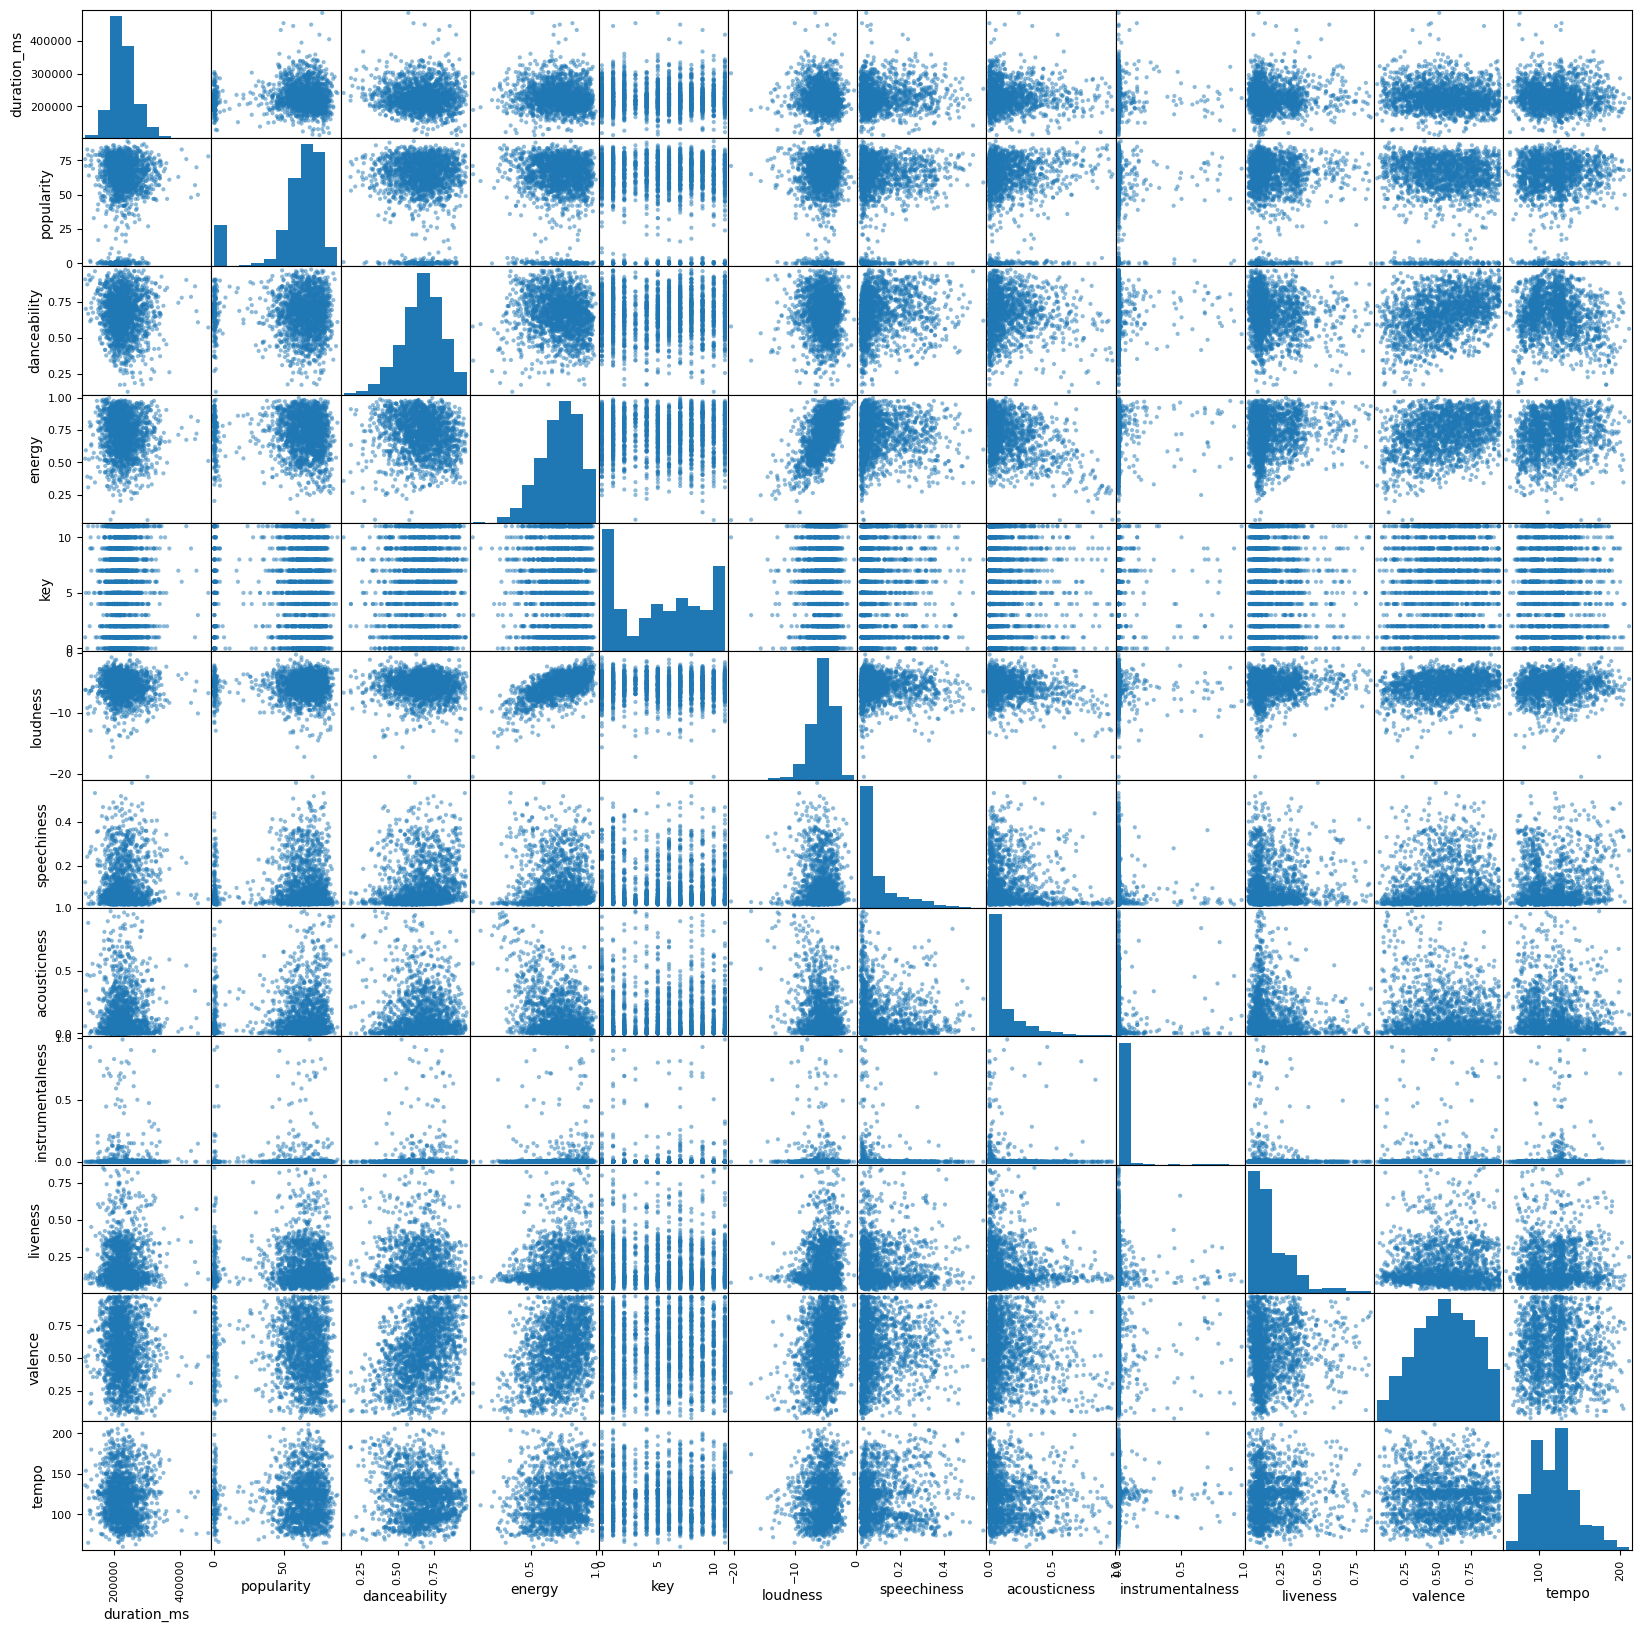

In [123]:
scatter_matrix(data[numerical_var],figsize=(20,20))


# Регрессия

In [125]:
data.drop(["artist","song","genre"],axis=1,inplace=True)
data["genre"]=label
print(data.shape)

(1899, 16)


In [126]:
data.describe()

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,228123.525540,59.558715,0.667637,0.721256,5.379147,-5.503538,0.104413,0.127722,0.015525,0.181934,0.552579,120.115425,27.306477
std,39116.687604,21.683909,0.140547,0.152511,3.610882,1.931067,0.096523,0.172951,0.089036,0.140827,0.220361,26.986107,10.770174
min,113000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,0.000000
25%,203273.000000,56.000000,0.581000,0.624500,2.000000,-6.480000,0.039900,0.013550,0.000000,0.088750,0.389500,98.605000,19.000000
50%,222920.000000,65.000000,0.676000,0.738000,6.000000,-5.279000,0.061300,0.055300,0.000000,0.125000,0.559000,120.028000,30.000000
75%,247086.000000,73.000000,0.765000,0.839000,8.000000,-4.167000,0.130500,0.175000,0.000064,0.242000,0.730500,134.124500,31.000000
max,484146.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,57.000000


Разбиваем выборку на обучающую и тестовую 

In [127]:
x = data.drop('popularity', axis = 1) # выбрасываем столбец 'class'


In [128]:
y = data['popularity']


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)



 Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(x_train,y_train)
pre1=li.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, pre1)
mse = metrics.mean_squared_error(y_test, pre1)
error = (mae / y_test.mean()) * 100

print("MAE:", mae)
print("MSE:", mse)
print("Percent Error:", error)

MAE: 15.323848263755977
MSE: 495.3861159751006
Percent Error: 26.037660258573027


Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor
de=DecisionTreeRegressor()
de.fit(x_train,y_train)
pre2=de.predict(x_test)
mae = metrics.mean_absolute_error(y_test, pre1)
mse = metrics.mean_squared_error(y_test, pre1)
error = (mae / y_test.mean()) * 100

print("MAE:", mae)
print("MSE:", mse)
print("Percent Error:", error)

MAE: 15.323848263755977
MSE: 495.3861159751006
Percent Error: 26.037660258573027


Random Forest

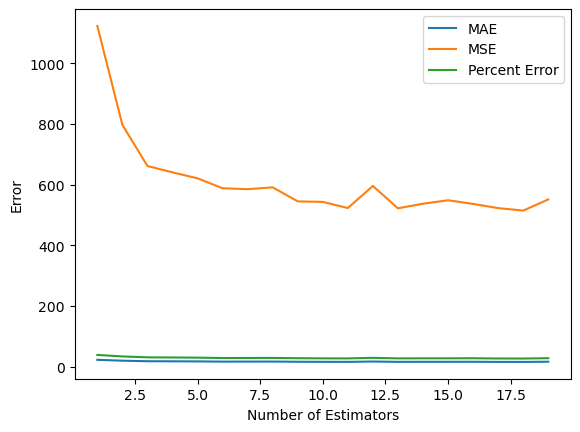

In [140]:
from sklearn.ensemble import RandomForestRegressor
mae_list = []
mse_list = []
error_list = []

for i in range(1, 20):
    ra = RandomForestRegressor(n_estimators=i)
    ra.fit(x_train, y_train)
    pre1 = ra.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, pre1)
    mse = metrics.mean_squared_error(y_test, pre1)
    error = (mae / y_test.mean()) * 100
    mae_list.append(mae)
    mse_list.append(mse)
    error_list.append(error)

plt.plot(range(1, 20), mae_list, label='MAE')
plt.plot(range(1, 20), mse_list, label='MSE')
plt.plot(range(1, 20), error_list, label='Percent Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()